
## 인공신경망 활용
-----
- pytorch를 사용하여 기본적인 인공신경망을 생성하여 이미지 분류기를 생성합니다.
- 데이터셋: [Fashion MNIST](https://pytorch.org/vision/0.9/datasets.html#fashion-mnist)

- **reference**
    - https://tutorials.pytorch.kr/beginner/basics/buildmodel_tutorial.html
    - https://tutorials.pytorch.kr/beginner/basics/data_tutorial.html

## Fashion MNIST Classifier
----
Fashion MNIST 데이터셋을 사용하여 옷의 품목을 구분하는 분류기를 신경망을 사용하여 구현해봅니다.

# 1번
- 필요한 모듈을 모두 이곳에 나열하세요
- 2점

In [ ]:
import numpy as np
import torch
from torch.utils.data import Dataset
from torchvision.transforms import ToTensor
from torchvision import datasets, transforms

import matplotlib.pyplot as plt

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# 2번
- FashionMNIST 데이터(train, test)를 불러오세요
- 2점

In [ ]:
# train(학습용) 데이터셋 로드
train_data = datasets.FashionMNIST(root='data',
                                   train=True,        # 학습용 데이터셋 설정(True)
                                   download=True,
                                   transform=ToTensor()
                                  )

# test(학습용) 데이터셋 로드
test_data = datasets.FashionMNIST(root='data',
                                  train=False,        # 검증용 데이터셋 설정(False)
                                  download=True,
                                  transform=ToTensor()
                                 )

100%|██████████| 26421880/26421880 [00:13<00:00, 1984090.58it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 176634.59it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3232314.31it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 20389307.83it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



# 3번
- train, test DataLoader를 만듭니다.
- 배치사이즈: 64
- 2점

In [ ]:
# 배치사이즈: 64
batch_size = 64 # batch_size 지정
num_workers = 8 # Thread 숫자 지정 (병렬 처리에 활용할 쓰레드 숫자 지정)

In [ ]:
# train, test DataLoader
train_loader = torch.utils.data.DataLoader(train_data,
                                           batch_size=batch_size,
                                           shuffle=True,
                                           num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data,
                                          batch_size=batch_size,
                                          shuffle=False,
                                          num_workers=num_workers)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


# 4번
- Device 설정은 GPU로 합니다
- 2점

In [ ]:
# device 설정 (cuda:0 혹은 cpu)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


# 5번
- train, test의 shape를 확인합니다.
- 2점

In [ ]:
# train, test의 shape를 확인
print(train_data.data.shape)
print(test_data.data.shape)

torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])


# 6번
- train, test의 첫번째 인덱스 데이터를 이미지로 확인합니다.
- 2점

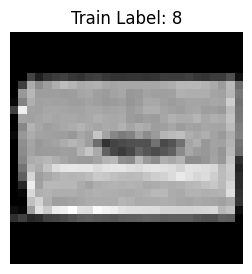

In [ ]:
# train의 첫번째 인덱스 데이터를 이미지로 확인
# DataLoader에서 첫 번째 배치 가져오기
batch_train = iter(train_loader)

# 첫 번째 인덱스의 이미지와 레이블 가져오기
imgs, labels = next(batch_train)

train_img, train_label = imgs[0], labels[0]

fig, ax = plt.subplots(figsize=(3, 4))

# 이미지 시각화
ax.imshow(train_img.squeeze(), cmap='gray')
ax.set_title(f'Train Label: {train_label.item()}')
ax.axis('off')

plt.show()

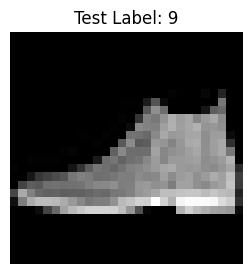

In [ ]:
# test의 첫번째 인덱스 데이터를 이미지로 확인
# DataLoader에서 첫 번째 배치 가져오기
batch_test = iter(test_loader)

# 첫 번째 인덱스의 이미지와 레이블 가져오기
imgs2, labels2 = next(batch_test)

test_img, test_label = imgs2[0], labels2[0]

fig, ax = plt.subplots(figsize=(3, 4))

# 이미지 시각화
ax.imshow(test_img.squeeze(), cmap='gray')
ax.set_title(f'Test Label: {test_label.item()}')
ax.axis('off')

plt.show()

# 7번
- FashionMNIST의 클래스를 labels_map 이름의 딕셔너리로 생성합니다.
- 2점

In [ ]:
# 7. FashionMNIST의 클래스를 labels_map 이름의 딕셔너리로 생성
labels_map = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

# 딕셔너리 확인
print(labels_map)

{0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}


# 8번
- 2행 5열로 train 데이터를 이미지로 출력합니다.
- labels_map를 이용하여 이미지의 label도 함께 출력합니다.
- 2점

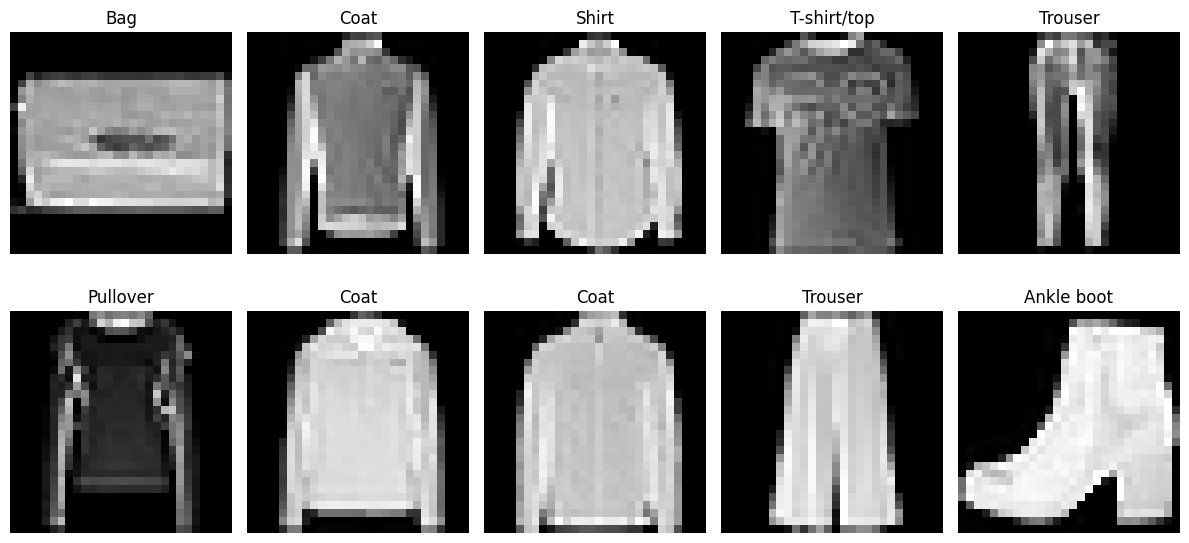

In [ ]:
# 2행 5열의 이미지 그리드 생성
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12, 6))

# 2x5 그리드에 이미지와 레이블 출력
for i, ax in enumerate(axes.flat):
    img = imgs[i].squeeze()
    label = labels_map[labels[i].item()]
    ax.imshow(img, cmap='gray')
    ax.set_title(label)
    ax.axis('off')

plt.tight_layout()
plt.show()

# 9번
- reference를 참고하여 인공신경망 클래스를 설계합니다.
- 2점

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        # 입력 이미지를 1차원 벡터로 평탄화
        self.flatten = nn.Flatten()
        # 신경망 계층 정의
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512), # 입력 크기: 28x28, 출력 크기: 512
            nn.ReLU(),
            nn.Linear(512, 512),   # 입력 크기: 512, 출력 크기: 512
            nn.ReLU(),
            nn.Linear(512, 10),    # 입력 크기: 512, 출력 크기: 10 (출력 클래스 수)
        )

    def forward(self, x):
        x = self.flatten(x)          # 입력을 평탄화
        logits = self.linear_relu_stack(x) # 신경망 계층 통과
        return logits

# 10번
- 인공신경망 객체를 GPU에 저장합니다.
- 2점

In [ ]:
# GPU 장치 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'Using device: {device}')

# NeuralNetwork 클래스 인스턴스 생성
model = NeuralNetwork()

# 모델을 지정한 장치(GPU 또는 CPU)로 이동
model.to(device)

Using device: cuda


NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)

# 11번
- 28*28 텐서를 GPU에 만들어 인공신경망에 input으로 넣어줍니다.
- 학습되지 않은 모델의 예측 결과를 출력합니다.
- 3점

In [ ]:
# 28x28 텐서를 GPU에 생성
test_input = torch.randn(1, 1, 28, 28).to(device)  # 배치 크기 1, 28x28 크기의 입력

# 학습되지 않은 모델의 예측 결과 출력
model.eval()  # 모델을 평가 모드로 설정
with torch.no_grad():  # 기울기 계산 비활성화
    output = model(test_input)
    probabilities = F.softmax(output, dim=1)
    _, predicted = torch.max(probabilities, 1)

print(f'Input Tensor: {test_input}')
print(f'Predicted class index: {predicted.item()}')
print(f'Probabilities: {probabilities}')

Input Tensor: tensor([[[[ 4.6676e-01, -2.4584e-01, -7.2009e-01,  8.4110e-01, -1.2410e+00,
           -4.7407e-01, -4.6162e-03,  1.2153e+00,  1.8595e+00,  3.4649e-02,
            2.2649e-01, -4.7351e-02,  1.0400e+00, -5.7578e-02,  6.5013e-01,
           -1.3447e+00, -2.5799e+00,  1.2407e+00, -2.4962e+00,  2.3351e+00,
            7.0796e-01,  4.2403e-01,  2.0474e+00,  9.4291e-01,  3.4892e-01,
           -1.0755e+00,  6.8714e-01, -1.7046e+00],
          [-5.3702e-01,  8.8164e-01, -6.2707e-01,  1.1168e+00, -5.0941e-01,
           -1.3841e-01, -1.5547e+00,  6.4781e-01,  1.0312e+00, -7.7138e-01,
            3.6288e-01,  6.6408e-01,  1.5487e+00, -1.7889e+00,  3.9227e-01,
           -9.3389e-01,  4.3369e-01,  4.3227e-01, -9.6628e-01,  4.2502e-01,
           -1.6821e+00,  5.5665e-01, -8.2289e-02, -7.0565e-01, -3.4625e-02,
           -1.0163e+00,  7.4906e-01, -1.3782e+00],
          [-1.1314e+00, -1.6904e+00,  1.7449e+00,  1.1324e+00, -4.6987e-02,
            9.2529e-01, -8.0717e-01,  7.5632e-01

# 12번
- 예측값을 소프트맥스 함수를 넣고 가장 높은 확률의 값을 출력합니다.
- 3점

In [ ]:
# 28x28 텐서를 GPU에 생성
input_tensor = torch.rand(1, 1, 28, 28).to(device)

# 모델에 입력으로 넣고 예측 결과 출력
with torch.no_grad():
    output = model(input_tensor)
    probabilities = F.softmax(output, dim=1)
    predicted_class = torch.argmax(probabilities, dim=1)
    highest_prob = torch.max(probabilities, dim=1)[0]
    print(f'Predicted class: {predicted_class.item()} with probability: {highest_prob.item()}')

Predicted class: 6 with probability: 0.11034665256738663


# 13번
- Loss 함수를 정의합니다.
- 학습률을 0.001로 설정합니다.
- 옵티마이저는 Adam을 사용합니다.
- 3점

In [ ]:
# 손실 함수 정의 (Cross-Entropy Loss)
loss_fn = nn.CrossEntropyLoss()

# 학습률 설정
learning_rate = 0.001

# 옵티마이저 설정 (Adam)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# 14번
- 학습 함수를 train_loop로 작성합니다.
- 매개변수(데이터로더, 모델, loss 함수, 옵티마이저)
- 데이터로더의 인덱스가 배치사이즈마다 loss를 출력합니다.
- 3점

In [ ]:
def train_loop(dataloader, model, loss_fn, optimizer):
    model.train()  # 모델을 학습 모드로 설정
    for batch_idx, (X, y) in enumerate(dataloader):
        # 입력 데이터와 레이블을 GPU로 이동
        X, y = X.to(device), y.to(device)

        # 예측 및 손실 계산
        pred = model(X)
        loss = loss_fn(pred, y)

        # 역전파(backpropagation)를 통해 그라디언트 계산 및 가중치 업데이트
        optimizer.zero_grad()  # 옵티마이저의 그라디언트 초기화
        loss.backward()  # 역전파 단계
        optimizer.step()  # 가중치 업데이트 단계

        # 배치마다 손실 출력
        if batch_idx % 10 == 0:  # 원하는 출력 빈도에 따라 수정 가능
            print(f"Batch {batch_idx}, Loss: {loss.item()}")

# 예시로 train_loader를 사용하여 train_loop 호출
# train_loader는 데이터로더 객체입니다.
# model, loss_fn, optimizer는 이미 정의된 객체입니다.
train_loop(train_loader, model, loss_fn, optimizer)

Batch 0, Loss: 2.3095293045043945
Batch 10, Loss: 1.216967225074768
Batch 20, Loss: 0.9599982500076294
Batch 30, Loss: 0.9419736266136169
Batch 40, Loss: 0.6963231563568115
Batch 50, Loss: 0.8074942231178284
Batch 60, Loss: 0.675710916519165
Batch 70, Loss: 0.6506773233413696
Batch 80, Loss: 0.6021479964256287
Batch 90, Loss: 0.5540080666542053
Batch 100, Loss: 0.793602466583252
Batch 110, Loss: 0.6023797392845154
Batch 120, Loss: 0.5796027183532715
Batch 130, Loss: 0.5134931802749634
Batch 140, Loss: 0.47515708208084106
Batch 150, Loss: 0.5192916989326477
Batch 160, Loss: 0.4660463035106659
Batch 170, Loss: 0.5668383836746216
Batch 180, Loss: 0.6493415832519531
Batch 190, Loss: 0.3278205692768097
Batch 200, Loss: 0.4474227726459503
Batch 210, Loss: 0.509369432926178
Batch 220, Loss: 0.46303248405456543
Batch 230, Loss: 0.47594600915908813
Batch 240, Loss: 0.4258238971233368
Batch 250, Loss: 0.6282480359077454
Batch 260, Loss: 0.25415468215942383
Batch 270, Loss: 0.4279680848121643
Bat

# 15번
- 테스트 함수를 test_loop로 작성합니다.
- 매개변수(데이터로더, 모델, loss 함수)
- 데이터로더의 크기만큼 반복하며 loss를 출력하고 전체 accuracy와 평균 loss를 구합니다.
- 3점

In [ ]:
def test_loop(dataloader, model, loss_fn):
    model.eval()  # 모델을 평가 모드로 설정
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss = 0
    correct = 0

    with torch.no_grad():  # 평가 단계에서는 그라디언트 계산을 비활성화
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)

            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    accuracy = correct / size

    print(f"Test Error: \n Accuracy: {(100*accuracy):>0.1f}%, Avg loss: {test_loss:>8f} \n")

# 예시로 test_loader를 사용하여 test_loop 호출
# test_loader는 데이터로더 객체입니다.
# model, loss_fn는 이미 정의된 객체입니다.
test_loop(test_loader, model, loss_fn)

Test Error: 
 Accuracy: 85.2%, Avg loss: 0.417860 



# 16번
- 100번의 epochs를 돌며 학습을 반복합니다.
- 3점

In [ ]:
num_epochs = 100

for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}/{num_epochs}")
    train_loop(train_loader, model, loss_fn, optimizer)
    test_loop(test_loader, model, loss_fn)
    print("-" * 50)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Batch 480, Loss: 0.038748010993003845
Batch 490, Loss: 0.08331236243247986
Batch 500, Loss: 0.07925177365541458
Batch 510, Loss: 0.07492920011281967
Batch 520, Loss: 0.04315323755145073
Batch 530, Loss: 0.02286987006664276
Batch 540, Loss: 0.005701302085071802
Batch 550, Loss: 0.03704298660159111
Batch 560, Loss: 0.04147292301058769
Batch 570, Loss: 0.07013300806283951
Batch 580, Loss: 0.01809374988079071
Batch 590, Loss: 0.010535003617405891
Batch 600, Loss: 0.030450014397501945
Batch 610, Loss: 0.023569952696561813
Batch 620, Loss: 0.056116629391908646
Batch 630, Loss: 0.12560543417930603
Batch 640, Loss: 0.01004802156239748
Batch 650, Loss: 0.03867409750819206
Batch 660, Loss: 0.12083090841770172
Batch 670, Loss: 0.03396096080541611
Batch 680, Loss: 0.057837311178445816
Batch 690, Loss: 0.08283057808876038
Batch 700, Loss: 0.06098967045545578
Batch 710, Loss: 0.07499224692583084
Batch 720, Loss: 0.04683848097920418
Batch 730, Loss: 0.0521115139126

# 17번
- 학습된 파라미터를 저장합니다.
- 파일명은 model_weights.pth로 합니다.
- 3점

In [ ]:
torch.save(model.state_dict(), "model_weights.pth")
print('Model weights saved to model_weights.pth')

Model weights saved to model_weights.pth


# 18번
- 새로운 인공신경망을 GPU에 만들고 위 학습된 파일(model_weights.pth)을 불러옵니다.
- 3점

In [ ]:
# 새로운 인공신경망 생성 및 GPU로 이동
new_model = NeuralNetwork().to(device)

# 학습된 파라미터 불러오기
new_model.load_state_dict(torch.load("model_weights.pth"))

# 모델 출력
print(new_model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


# 19번
- 위 모델에 test 데이터로더를 입력하고 결과를 확인합니다.
- 3점

In [ ]:
# 결과를 저장할 리스트
all_images = []
all_labels = []
all_preds = []
# 테스트 데이터로더를 통한 반복
with torch.no_grad():  # Gradient 계산을 비활성화
    for inputs, labels in test_loader:
        # 데이터를 GPU로 이동
        inputs, labels = inputs.to(device), labels.to(device)
        # 모델의 예측 수행
        outputs = new_model(inputs)
        # 예측 값을 가져오기
        _, preds = torch.max(outputs, 1)
        # 결과를 리스트에 추가
        all_images.append(inputs.cpu())
        all_labels.append(labels.cpu())
        all_preds.append(preds.cpu())
        # 필요에 따라 몇 샘플만 가져올 수 있습니다.
        break  # 여기를 제거하면 전체 데이터를 확인할 수 있습니다.
# 모든 이미지, 레이블, 예측을 결합
all_images = torch.cat(all_images)
all_labels = torch.cat(all_labels)
all_preds = torch.cat(all_preds)
# 예측 결과와 실제 레이블을 출력
print("이미지:", all_images)
print("예측 결과:", all_preds)
print("실제 레이블:", all_labels)

이미지: tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..

# 20번
- 2행 5열로 test 데이터를 이미지로 출력합니다.
- 학습된 모델이 분류기가 잘 작동하는지 label과 예측된 결과를 동시에 출력합니다.
- 3점

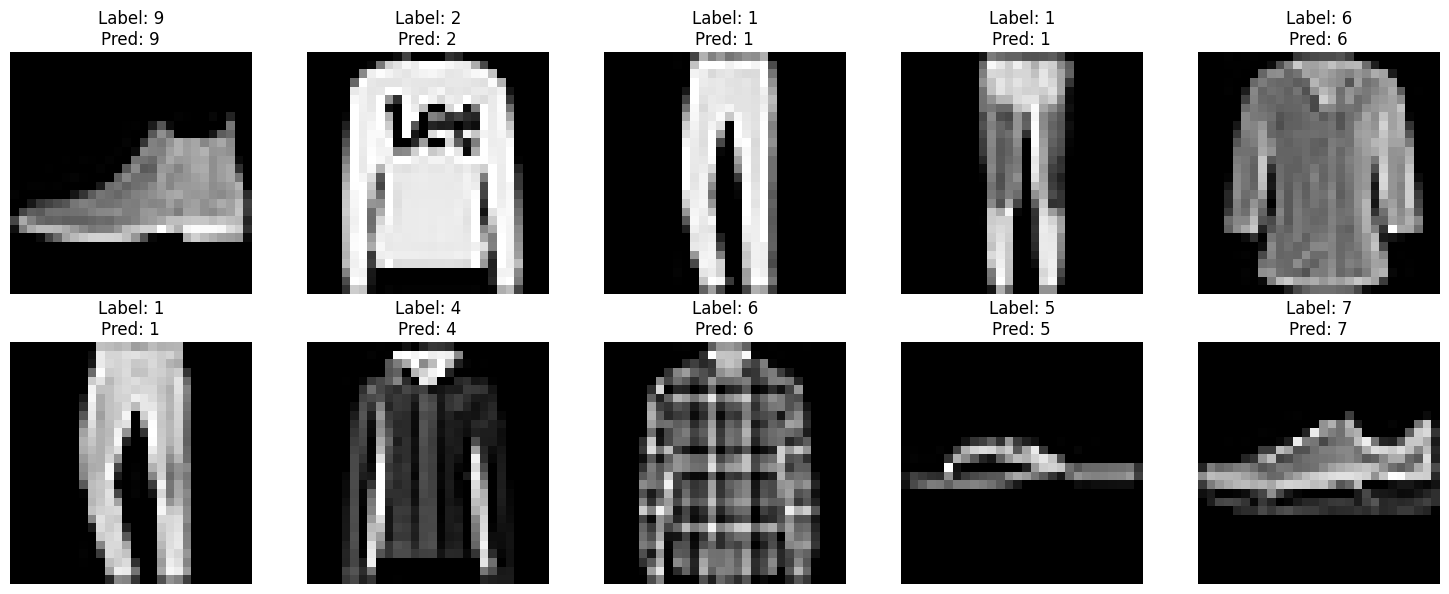

In [ ]:
# 이미지를 2행 5열로 출력
num_images = 10
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()
for i in range(num_images):
    # 이미지를 numpy 배열로 변환 (예: [C, H, W] -> [H, W, C])
    image = all_images[i].permute(1, 2, 0).numpy()
    # 레이블과 예측 결과 가져오기
    label = all_labels[i].item()
    pred = all_preds[i].item()
    # 이미지 출력
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f"Label: {label}\nPred: {pred}")
    axes[i].axis('off')
plt.tight_layout()
plt.show()